In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime



In [152]:
# system_name = 'rossler'
system_name = 'rabinovich_fabrikant'
# system_name = 'lorentz'
# system_name = 'chua'
system_name += '1d'

time_start = datetime(2020, 7, 25, 18)  # 


In [156]:
result_file0 = './result_attention0.csv' 
df = pd.read_csv(result_file0, index_col = 'datetime')
df.index = pd.DatetimeIndex(df.index)
df = df[df.index > time_start]
set(df['model_name'])

{'ESN',
 'ESN-ATTN',
 'RBFLN',
 'RBFLN-RE-echostate',
 'RBFLN-RE-transform',
 'RBFN',
 'VAR'}

# mse v.s. embedding dimension

In [157]:
average = pd.DataFrame()
for i in range(10):
    result_file = './result_attention' +str(i) + '.csv' 
    df = pd.read_csv(result_file, index_col = 'datetime')
    df.index = pd.DatetimeIndex(df.index)
    df = df[df.index > time_start]
    
    result = df[df['system_name'].isin([system_name]) & df['horizon'].isin([10])]
    

    final = None
    for w in set(result['n_history']):

        temp = result.loc[result['n_history'] == w, ['model_name', 'mse', 'n_history']].groupby('model_name').min().reset_index()

        final = temp if final is None else final.append(temp, ignore_index=True)
        
    average = average.append(final)


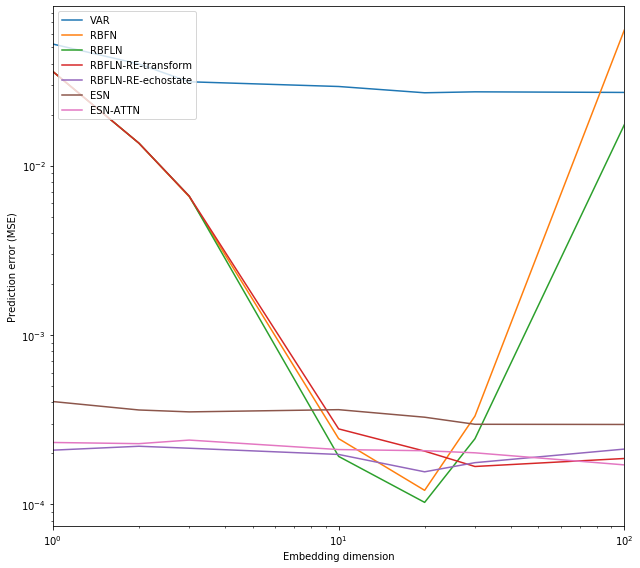

In [158]:
fig, ax = plt.subplots(figsize=(9,8))
model_names = [ 'VAR', 'RBFN', 'RBFLN', 'RBFLN-RE-transform', 'RBFLN-RE-echostate','ESN', 'ESN-ATTN']
# model_names = [ 'RBFLN rc', 'RBFLN ESN']
for name in model_names:

    average.loc[average['model_name'] == name].groupby('n_history').mean().sort_values(by='n_history').plot(ax = ax)

# pt[('amin', 'mse', 100, 1.0)].plot(ax=ax)
# esn = average.loc[average['model_name'] == 'ESN'].groupby('n_history').mean().iloc[0]
# plt.plot([1,200], [esn,esn], '--')
plt.legend(labels= model_names, loc='upper left')

ax.set_yscale("log")
ax.set_xscale("log")
plt.xlabel('Embedding dimension')
plt.ylabel('Prediction error (MSE)')
plt.tight_layout()
# plt.title('Chua-like')
plt.savefig('../attention_'+system_name+'_mse_window'+datetime.now().strftime('_%Y_%m_%d_%H_%M')+'.pdf')
# plt.savefig('../_mse_window.pdf')
plt.show()